O Boston Housing Dataset consiste no preço de casas em vários locais em Boston. 

O conjunto de dados fornece as informações:

1)'crime': taxa de criminalidade per capita por cidade.

2)'zn': proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.

3)'indus': proporção de negócios não varejistas por cidade.

4)'chas': variável dummy de Charles River (= 1 se faz fronteira com o rio; 0 caso contrário).

5)'nox': concentração de óxidos de nitrogênio (partes por 10 milhões).

6)'rm': número médio de quartos por habitação.

7)'idade': proporção de unidades ocupadas pelo proprietário construídas antes de 1940.

8)'dis': média ponderada das distâncias a cinco centros de empregos de Boston.

9)'rad': índice de acessibilidade às rodovias radiais.

10)'imposto': taxa de imposto sobre a propriedade de valor total por $ 10.000.

11)'ptratio': proporção aluno-professor por cidade.

12)'preto': 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade.

13)'lstat': status inferior da população (porcentagem).

14)'medv': valor médio de casas ocupadas pelo proprietário em $ 1000


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
dados=pd.read_csv('boston.csv')

In [8]:
#Observando os dados
dados.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [56]:
#Verificando a existência de dados duplicados
dados.duplicated().sum()

0

In [60]:
#Não existem dados duplicados, se existissem iria tirá-los com o código:
dados=dados.drop_duplicates()

Verificando se existem valores nulos:

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [13]:
#Descrição dos dados
dados.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


O Banco de Dados trata-se de 506 dados com 14 colunas.

In [12]:
dados.shape

(506, 14)

In [15]:
dados.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

O tipo do dado:

In [20]:
dados.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Verificando a quantidade de valores diferentes em cada coluna.

In [50]:
dados.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

A variável a ser predita é MEDV, o preço médio das casas. A distribuição dessa variável pode ser vista abaixo:

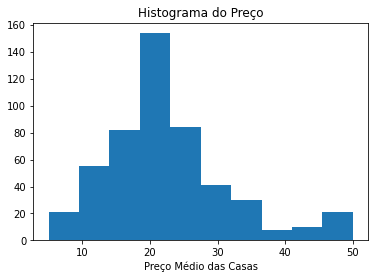

In [48]:
%matplotlib inline
plt.hist(dados['MEDV'])
plt.title("Histograma do Preço")
plt.xlabel("Preço Médio das Casas")
plt.show()

Histograma de todas as variáveis contínuas:

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>]],
      dtype=object)

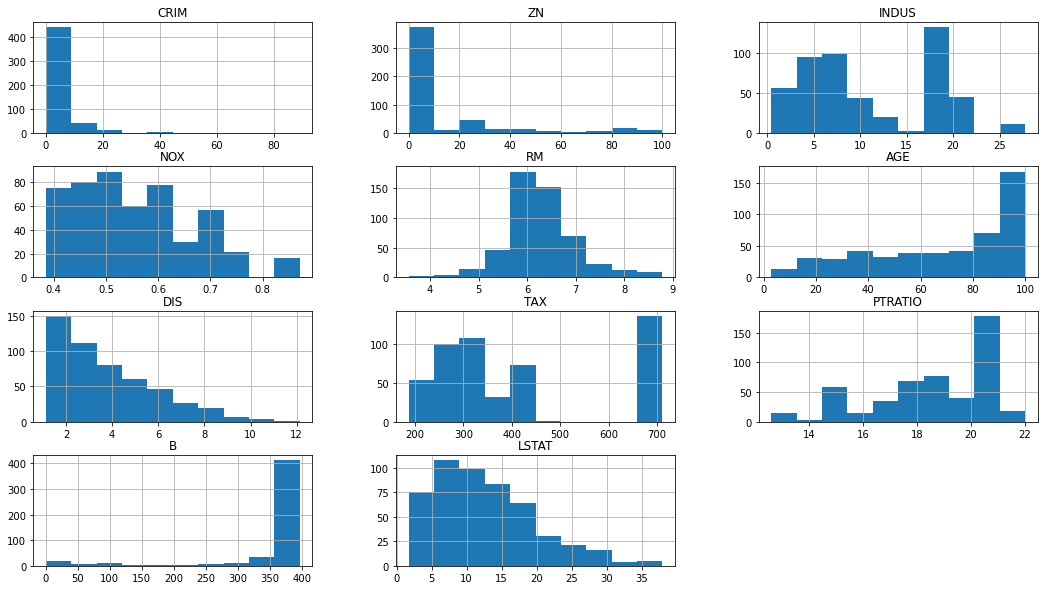

In [63]:
dados.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT'], figsize=(18,10))

<AxesSubplot:>

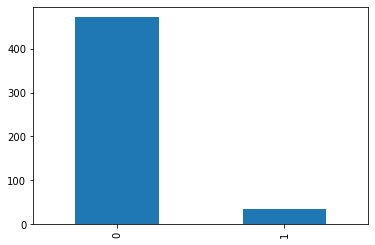

In [78]:
#Gráfico de Barras para as variáveis categóricas
dados['CHAS'].value_counts().plot(kind='bar')


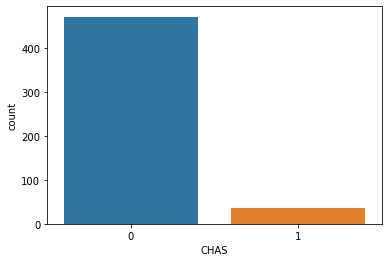

In [89]:
bar1 = sns.countplot(x="CHAS", data=dados)


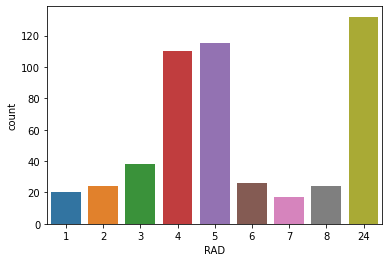

In [87]:
bar2=sns.countplot(x='RAD',data=dados)

<AxesSubplot:ylabel='MEDV'>

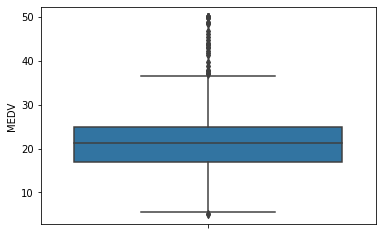

In [93]:
sns.boxplot(y='MEDV', data=dados)

<AxesSubplot:>

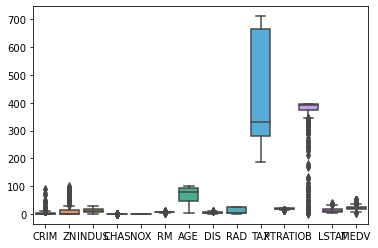

In [95]:
sns.boxplot(data=dados)